In [1]:
# import required libraries
import os, sys
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score
import matplotlib.lines as mlines
import warnings

In [2]:
# Load All measured RDC Datasets for reference:
E0_rdc = pd.read_csv("data/RDC_Data/E0-wt-TAR.sas.csv")
EI22_rdc = pd.read_csv("data/RDC_Data/EI22-wt-TAR.sas.csv")
EII3_rdc = pd.read_csv("data/RDC_Data/EII3-wt-TAR.sas.csv")
EII13_rdc = pd.read_csv("data/RDC_Data/EII13-wt-TAR.sas.csv")

E0_N = E0_rdc.shape[0]
EI22_N = EI22_rdc.shape[0]
EII3_N = EII3_rdc.shape[0]
EII13_N = EII13_rdc.shape[0]

E0_rdc["construct"] = "E0"
EI22_rdc["construct"] = "EI22"
EII3_rdc["construct"] = "EII3"
EII13_rdc["construct"] = "EII13"

All_rdc = pd.concat([E0_rdc, EI22_rdc, EII3_rdc, EII13_rdc], ignore_index=True).drop(columns = "qc")
print("Read in total of %d RDCs:"%(All_rdc.shape[0]))

Read in total of 118 RDCs:


In [3]:
# Create masks for different domains and constructs:
df = All_rdc.copy()
maskE0 = df["construct"] == "E0"
maskEI22 = df["construct"] == "EI22"
maskEII3 = df["construct"] == "EII3"
maskEII13 = df["construct"] == "EII13"
maskH1 = (df.res_id_1.isin([18, 19, 20 ,21, 22]) | df.res_id_1.isin([40, 41, 42, 43, 44]))
maskH2 = (df.res_id_1.isin([27, 28, 29]) | df.res_id_1.isin([36, 37, 38]))
maskL = df.res_id_1.isin([30, 31, 32, 33, 34, 35])
maskB = df.res_id_1.isin([23, 24, 25])

In [4]:
# Define function for scaling PALES predicted RDCs wrt measured RDCs:
def get_scaled_rdcs(pm):
    mff = All_rdc.copy() 
    pmm = pm.copy()     
    pm = np.mean(pmm, axis=1)    
    maskE0 = mff["construct"] == "E0"
    maskEI22 = mff["construct"] == "EI22"
    maskEII3 = mff["construct"] == "EII3"
    maskEII13 = mff["construct"] == "EII13"
    mm = np.array(mff["rdc"], dtype=float)
    LE0 = np.dot(mm[maskE0],pm[maskE0])/np.dot(pm[maskE0],pm[maskE0])
    LEI22 = np.dot(mm[maskEI22],pm[maskEI22])/np.dot(pm[maskEI22],pm[maskEI22])
    LEII3 = np.dot(mm[maskEII3],pm[maskEII3])/np.dot(pm[maskEII3],pm[maskEII3])
    LEII13 = np.dot(mm[maskEII13],pm[maskEII13])/np.dot(pm[maskEII13],pm[maskEII13])
    pmm[maskE0] = pmm[maskE0] * LE0
    pmm[maskEI22] = pmm[maskEI22] * LEI22
    pmm[maskEII3] = pmm[maskEII3] * LEII3
    pmm[maskEII13] = pmm[maskEII13] * LEII13
    scaled_pm = pmm.copy()
    scaled_mm = mm.copy()
    return scaled_pm, scaled_mm


# Define function for calculating coeff of determination for ens. model RDCs
def calc_r2_denovo(x, y):
    TSS = np.sum((x - np.mean(x))**2)
    RSS = np.sum((x - y)**2)
    return (1-RSS/TSS)

In [5]:
# Settings for matplotlib
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 20})
warnings.filterwarnings('ignore')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
sns.set_context('poster')

col_dict = {}
for i in range(17,23):
    col_dict[i] = "red"
for i in range(40,46):
    col_dict[i] = "red"
for i in range(26,30):
    col_dict[i] = "blue"
for i in range(36,40):
    col_dict[i] = "blue"
for i in range(23,26):
    col_dict[i] = "orange"
for i in range(30,36):
    col_dict[i] = "green"

fill_dict = {}
for i in range(17,23):
    fill_dict[i] = "full"
for i in range(40,46):
    fill_dict[i] = "none"
for i in range(26,30):
    fill_dict[i] = "full"
for i in range(36,40):
    fill_dict[i] = "none"
for i in range(23,26):
    fill_dict[i] = "full"
for i in range(30,36):
    fill_dict[i] = "full"
    
mk_dict = {
    'C6H6':'s', 'C8H8':'s', 'C2H2':'s', # aromatic
    "C1'H1'": 'o', "C4'H4'": 'o', # sugars
    "C5H5": 'D', #c5's
    "N1H1": '^', "N3H3": '^' # iminos
}

*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations
     res_id_1 res_name_1 atom_1  res_id_2 res_name_2 atom_2 bond_vector  \
32         33          G     C8        33          G     H8        C8H8   
33         33          G    C1'        33          G    H1'      C1'H1'   
71         33          G     C8        33          G     H8        C8H8   
72         33          G    C1'        33          G    H1'      C1'H1'   
81         33          G     C8        33          G     H8        C8H8   
88         33          G    C1'        33          G    H1'      C1'H1'   
107        33          G     C8        33          G     H8        C8H8   
110        33          G    C1'        33          G    H1'      C1'H1'   

        rdc construct    mRDC       pRDC     delta  
32   15.500        E0  15.500  15.415738  0.084262  
33    0.900        E0   0.900   0.838689  0.061311  
71   13.400      E

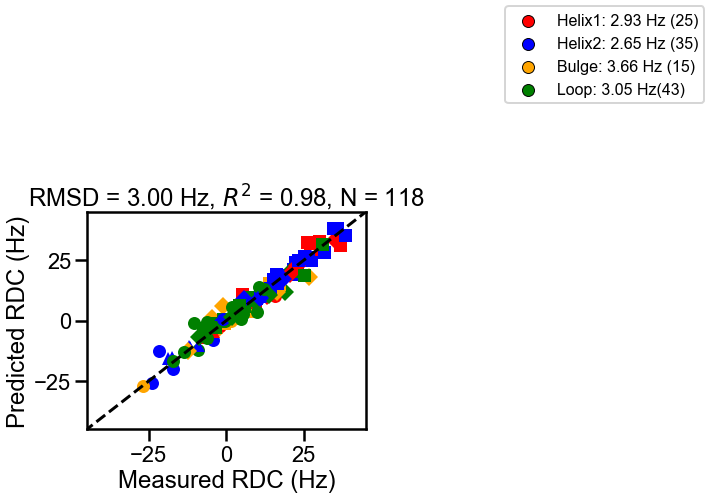

In [11]:
###################### FARFAR-NMR #####################
idx = np.array(np.genfromtxt("data/Unbiased_Lib_All_Data/Unbiased_SAS_20X100_500K_BestIndices.txt"), dtype=int)
pm = np.genfromtxt("data/Unbiased_Lib_All_Data/Unbiased_pmatrix.txt", dtype=float)[:, idx]
mm = np.genfromtxt("data/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(5,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=13, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o",  
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o",  
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o",
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})

#plt.savefig("plots/Unbiased_Lib_All_Data_Ens_Correlation.pdf")

plt.show()
df["delta"] = df.mRDC - df.pRDC
print(df.loc[(df.res_id_1 == 33 )])


*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations
     res_id_1 res_name_1 atom_1  res_id_2 res_name_2 atom_2 bond_vector  \
32         33          G     C8        33          G     H8        C8H8   
33         33          G    C1'        33          G    H1'      C1'H1'   
71         33          G     C8        33          G     H8        C8H8   
72         33          G    C1'        33          G    H1'      C1'H1'   
81         33          G     C8        33          G     H8        C8H8   
88         33          G    C1'        33          G    H1'      C1'H1'   
107        33          G     C8        33          G     H8        C8H8   
110        33          G    C1'        33          G    H1'      C1'H1'   

        rdc construct    mRDC      pRDC      delta  
32   15.500        E0  15.500  3.522825  11.977175  
33    0.900        E0   0.900  1.441875  -0.541875  
71   13.400      E

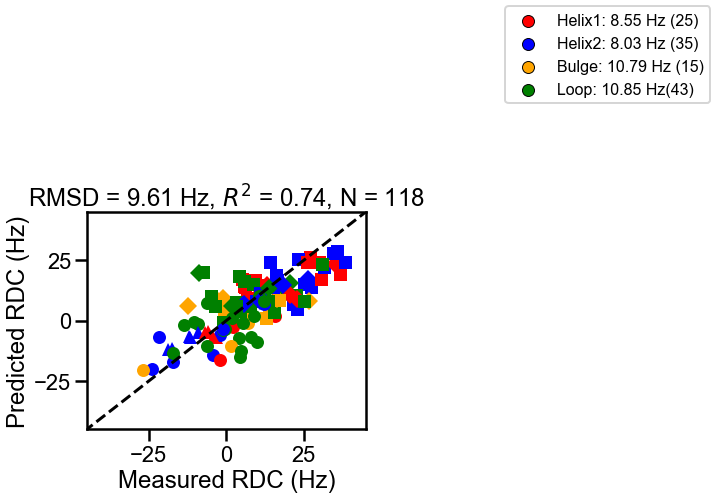

In [12]:
###################### FARFAR Library #####################
idx = np.array(np.genfromtxt("data/Unbiased_Lib_All_Data/Unbiased_SAS_20X100_500K_BestIndices.txt"), dtype=int)
pm = np.genfromtxt("data/Unbiased_Lib_All_Data/Unbiased_pmatrix.txt", dtype=float)[:, :]
mm = np.genfromtxt("data/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(5,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=13, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o",  
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o",  
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o",
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})

#plt.savefig("plots/Unbiased_Lib_All_Data_Lib_Correlation.pdf")

plt.show() 

df["delta"] = df.mRDC - df.pRDC
print(df.loc[(df.res_id_1 == 33 )])


*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations
     res_id_1 res_name_1 atom_1  res_id_2 res_name_2 atom_2 bond_vector  \
32         33          G     C8        33          G     H8        C8H8   
33         33          G    C1'        33          G    H1'      C1'H1'   
71         33          G     C8        33          G     H8        C8H8   
72         33          G    C1'        33          G    H1'      C1'H1'   
81         33          G     C8        33          G     H8        C8H8   
88         33          G    C1'        33          G    H1'      C1'H1'   
107        33          G     C8        33          G     H8        C8H8   
110        33          G    C1'        33          G    H1'      C1'H1'   

        rdc construct    mRDC       pRDC      delta  
32   15.500        E0  15.500   4.309303  11.190697  
33    0.900        E0   0.900  -2.135501   3.035501  
71   13.400    

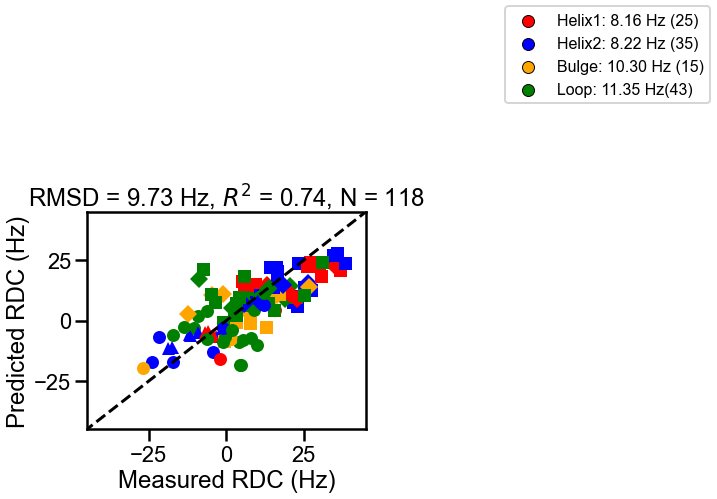

In [6]:
###################### FARFAR-random #####################
idx = np.array(np.genfromtxt("data/Unbiased_Lib_All_Data/Unbiased_SAS_20X100_500K_BestIndices.txt"), dtype=int)

pm = np.genfromtxt("data/Unbiased_Lib_All_Data/Unbiased_pmatrix.txt", dtype=float)[:, np.random.randint(0, high=10000, size=20)]
mm = np.genfromtxt("data/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(5,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=13, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o",  
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o",  
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o",
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})

#plt.savefig("plots/Unbiased_Lib_All_Data_Random_Correlation.pdf")

plt.show()
df["delta"] = df.mRDC - df.pRDC
print(df.loc[(df.res_id_1 == 33 )])


*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations
     res_id_1 res_name_1 atom_1  res_id_2 res_name_2 atom_2 bond_vector  \
13         24          C     C5        24          C     H5        C5H5   
28         31          U     C5        31          U     H5        C5H5   
46         41          C     C6        41          C     H6        C6H6   
55         22          A     C2        22          A     H2        C2H2   
60         24          C     C5        24          C     H5        C5H5   
76         43          G     C8        43          G     H8        C8H8   
91         31          U    C1'        31          U    H1'      C1'H1'   
94         36          G    C1'        36          G    H1'      C1'H1'   
112        30          C    C1'        30          C    H1'      C1'H1'   

         rdc construct     mRDC       pRDC      delta  
13   -1.0000        E0  -1.0000   5.086390  -6

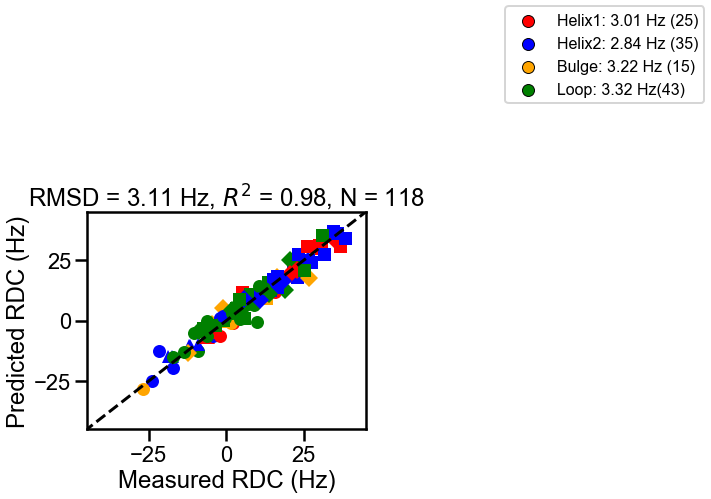

In [31]:
###################### Unbiased NoClash Ensemble N=20 Best RMSD #####################
idx = np.array(np.genfromtxt("data/Unbiased_NoClash_Lib_All_Data/Unbiased_NoClash_Lib_All_Data_BestIndices.txt"), dtype=int)
pm = np.genfromtxt("data/Unbiased_NoClash_Lib_All_Data/Unbiased_NoClash_Lib_All_Data_pmatrix.txt", dtype=float)[:, idx]
mm = np.genfromtxt("data/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(5,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=13, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o",  
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o",  
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o",
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})
plt.show()
df["delta"] = df.mRDC - df.pRDC
print(df.loc[(df.delta >= 5) | (df.delta <= -5)])


*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations


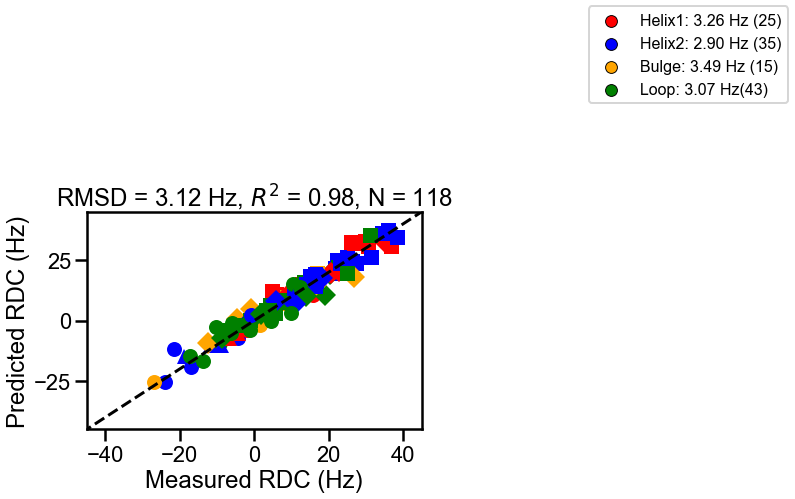

In [8]:
###################### GS Only #####################
idx = np.array(np.genfromtxt("data/GSOnly_SAS_20X100_500K_Best_Indices.txt"), dtype=int)
pm = np.genfromtxt("data/GSOnly_pmatrix.txt", dtype=float)[:, idx]
mm = np.genfromtxt("data/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(6,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=15, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o", s=140, 
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o", s=140, 
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", s=140, 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o", s=140, 
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})

plt.show()


*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations


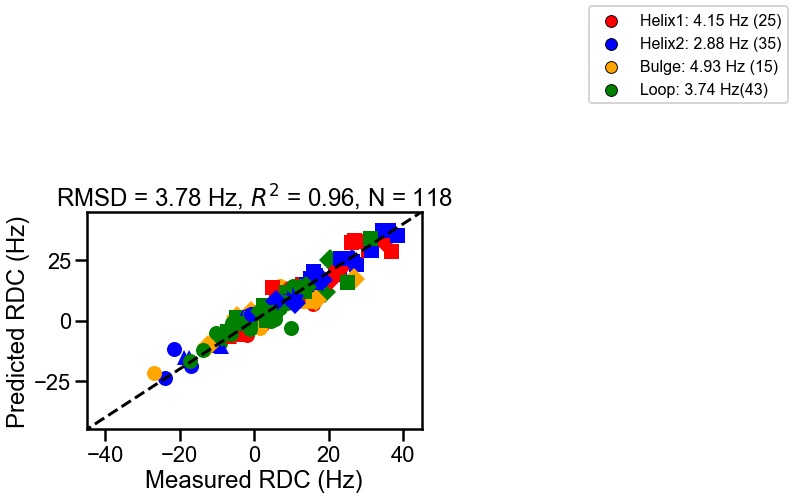

In [9]:
###################### GS Weak Filter Only #####################
idx = np.array(np.genfromtxt("data/GSOnlyWeakFilter_SAS_BestIndices.txt"), dtype=int)
pm = np.genfromtxt("data/GSOnly_WeakFilter_pmatrix.txt", dtype=float)[:, idx]
mm = np.genfromtxt("data/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(6,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=15, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o", s=140, 
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o", s=140, 
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", s=140, 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o", s=140, 
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})

plt.show()



*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations


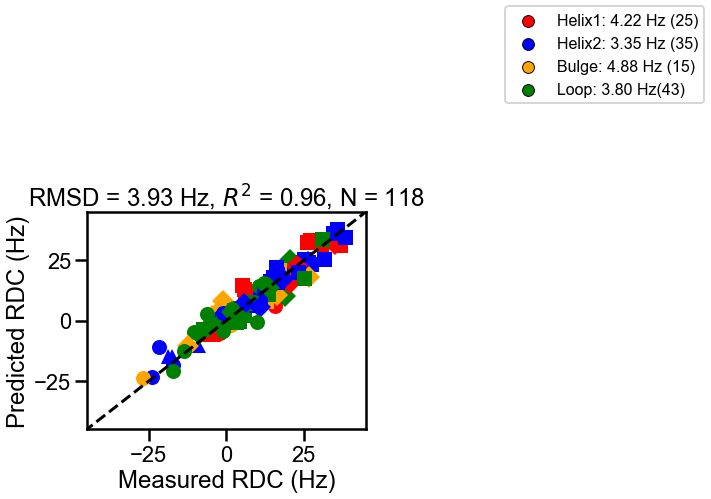

In [8]:
###################### GS Weak Filter Only #####################
idx = np.array(np.genfromtxt("data/GS_Filtering/GSOnlyStrongFilter_SAS_BestIndices.txt"), dtype=int)
pm = np.genfromtxt("data/GS_Filtering/GSOnlyStrongFilter_pmatrix.txt", dtype=float)[:, idx]
mm = np.genfromtxt("data/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(5,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=15, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o", s=140, 
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o", s=140, 
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", s=140, 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o", s=140, 
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})

plt.show()


*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations


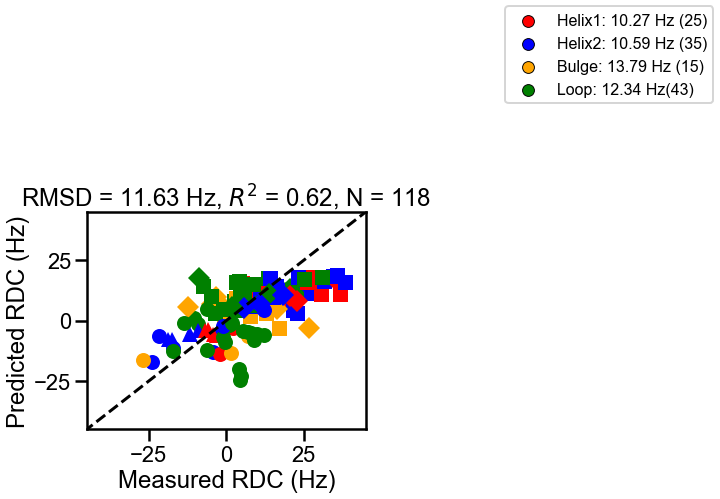

In [13]:
###################### FARFAR-lowest-energy #####################
idx = [4695,
 7110,
 5269,
 6353,
 8468,
 5898,
 8004,
 6978,
 5179,
 8688,
 8359,
 7431,
 8119,
 9003,
 6062,
 7168,
 593,
 8552,
 8129,
 9871]
idx = np.array(idx, dtype=int)
pm = np.genfromtxt("data/wtTAR_GS_ES1G34syn_Unbiased_pmatrix.txt", dtype=float)[:, idx]
mm = np.genfromtxt("data/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(5,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=15, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o", s=140, 
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o", s=140, 
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", s=140, 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o", s=140, 
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})

plt.show()


*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations


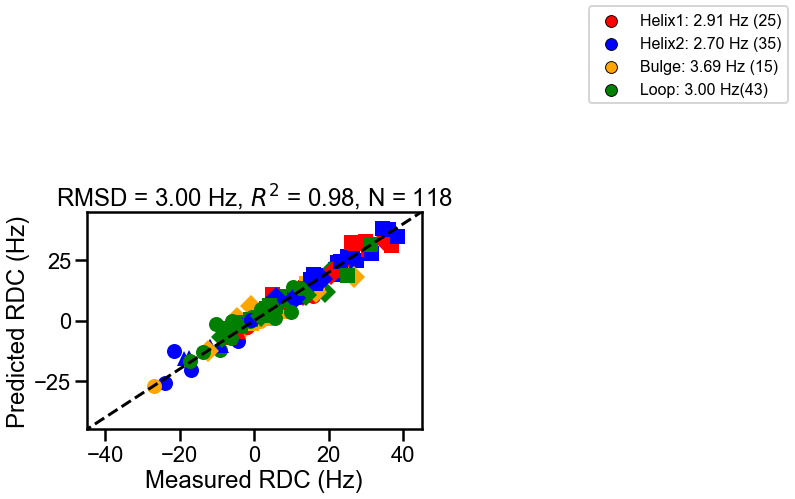

In [6]:
###################### Outlier Fixed Lowest RMSD Ensemble Version 1 #####################
idx = np.array(range(20), dtype=int)
pm = np.genfromtxt("data/outlier_modified_ensemble/Unbiased_LowestRMSD_Ensemble_OutlierModified1/sas/pmatrix.txt", dtype=float)[:, idx]
mm = np.genfromtxt("data/outlier_modified_ensemble/Unbiased_LowestRMSD_Ensemble_OutlierModified1/sas/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(6,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=15, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o", s=140, 
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o", s=140, 
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", s=140, 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o", s=140, 
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})


*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations


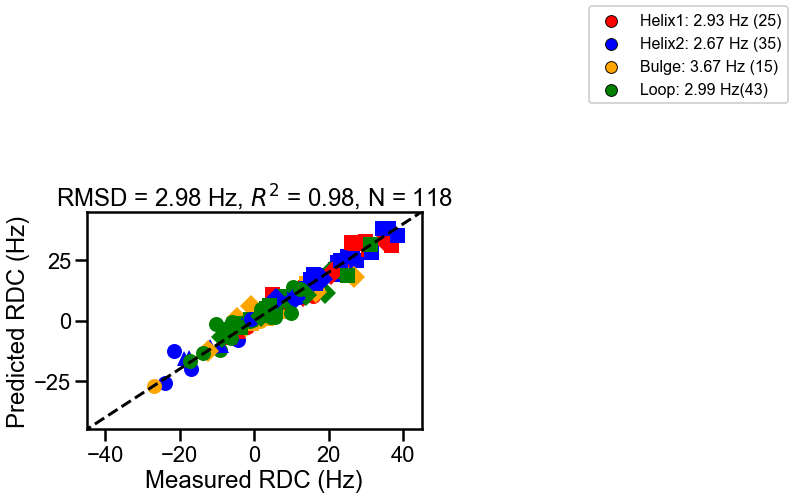

In [7]:
###################### Outlier Fixed Lowest RMSD Ensemble Version 2 #####################
idx = np.array(range(20), dtype=int)
pm = np.genfromtxt("data/outlier_modified_ensemble/Unbiased_LowestRMSD_Ensemble_OutlierModified2/sas/pmatrix.txt", dtype=float)[:, idx]
mm = np.genfromtxt("data/outlier_modified_ensemble/Unbiased_LowestRMSD_Ensemble_OutlierModified2/sas/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(6,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=15, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o", s=140, 
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o", s=140, 
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", s=140, 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o", s=140, 
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})


*******************************************************************
Read in 20 RDC selected indices in best ensemble
Plotting 118 RDC correlations


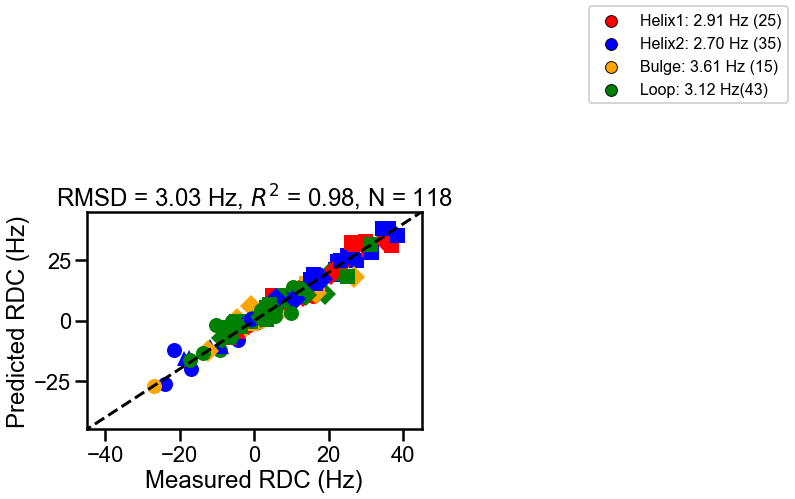

In [8]:
###################### Outlier Fixed Lowest RMSD Ensemble Version 4 #####################
idx = np.array(range(20), dtype=int)
pm = np.genfromtxt("data/outlier_modified_ensemble/Unbiased_LowestRMSD_Ensemble_OutlierModified4/sas/pmatrix.txt", dtype=float)[:, idx]
mm = np.genfromtxt("data/outlier_modified_ensemble/Unbiased_LowestRMSD_Ensemble_OutlierModified4/sas/mmatrix.txt", dtype=float)
print("*******************************************************************")
print("Read in %d RDC selected indices in best ensemble"%idx.shape[0])
scaled_pm, mm = get_scaled_rdcs(pm)
df = All_rdc.copy()
df["mRDC"] = mm
df["pRDC"] = np.mean(scaled_pm, axis=1)

print("Plotting %d RDC correlations"%df.shape[0])

fig, ax = plt.subplots(figsize=(6,4))
mrdc_scaled = df["mRDC"]
prdc_scaled = df["pRDC"]

x = df["mRDC"]
y = df["pRDC"]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
ax.set_title("RMSD = %3.2f Hz, $R^2$ = %3.2f, N = %d"%(RMSD, R, N))

for idx, row in df.iterrows():
    plt.plot(row["mRDC"], row["pRDC"], color=col_dict[row["res_id_1"]], marker=mk_dict[row["bond_vector"]], markersize=15, 
                markeredgecolor="k", markeredgewidth=0)

# Make Legends:
helix_1_mask = (df["res_id_1"] <= 22) | (df["res_id_1"] >= 40)
x = mrdc_scaled[helix_1_mask]
y = prdc_scaled[helix_1_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="red", marker="o", s=140, 
                label="Helix1: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

helix_2_mask = ((df["res_id_1"] >= 26)&(df["res_id_1"] <= 29)) | ((df["res_id_1"] >= 36)&(df["res_id_1"] <= 39))
x = mrdc_scaled[helix_2_mask]
y = prdc_scaled[helix_2_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="blue", marker="o", s=140, 
                label="Helix2: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

bulge_mask = (df["res_id_1"] >= 23)&(df["res_id_1"] <= 25)
x = mrdc_scaled[bulge_mask]
y = prdc_scaled[bulge_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="orange", marker="o", s=140, 
                label="Bulge: %3.2f Hz (%d)"%(RMSD, N), edgecolor="k")

loop_mask = (df["res_id_1"] >= 30)&(df["res_id_1"] <= 35)
x = mrdc_scaled[loop_mask]
y = prdc_scaled[loop_mask]
RMSD = np.sqrt(np.mean((x-y)**2))
R = np.corrcoef(x, y)[0, 1]
N = x.shape[0]
sns.scatterplot(x=[-100], y=[-100], color="green", marker="o", s=140, 
                label="Loop: %3.2f Hz(%d)"%(RMSD, N), edgecolor="k")

plt.rcParams.update({'font.size': 20})
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Predicted RDC (Hz)")
ax.set_xlim([-45, 45])
ax.set_ylim([-45, 45])
plt.plot([-50, 50], [-50, 50], "k--")
plt.legend(loc=(1.5, 1.5), prop={'size': 16})
